## Handling Missing Value

In [ ]:
import seaborn as sns

df=sns.load_dataset('titanic')
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
##check missing values
df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
##in Age and deck having missing values

In [ ]:
## Delete the rows or data point to handle missing values is one option
##but we can loss more data

print(df.shape)

df.dropna().shape

(891, 15)


(182, 15)

In [ ]:
##see how much data is lost so this is not good way

In [ ]:
##column wise
## we can remove deck col but not age col
##boz age col is more important while analysing data
##best way is Imputation technique

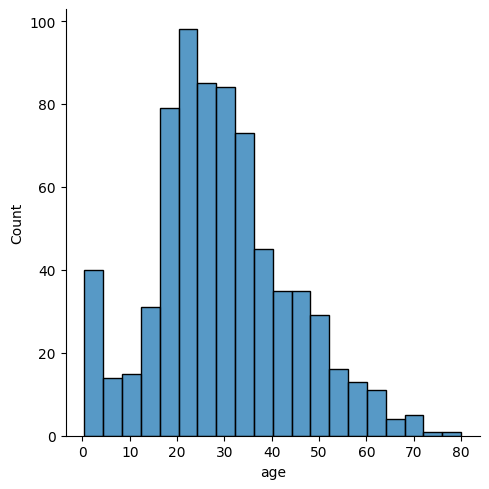

In [ ]:
#1. Mean Value Imputation

sns.displot(df['age'])



<Axes: xlabel='age', ylabel='Count'>

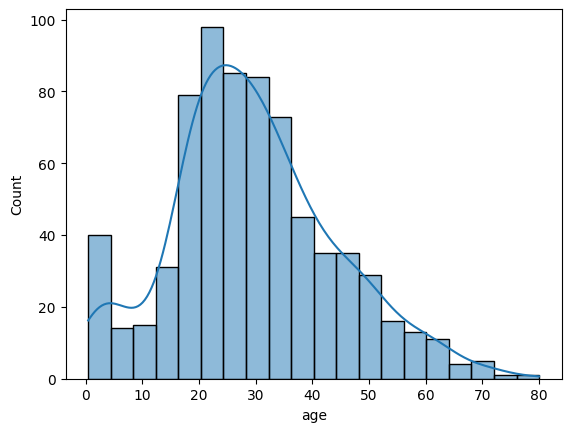

In [ ]:
sns.histplot(df['age'],kde=True)

In [ ]:
## It looks like normal distribution
## There is 177 missing values there
## handle missing value using mean

df['Age_mean'] = df['age'].fillna(df['age'].mean())


In [ ]:
df[['Age_mean','age']]

,Age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


In [ ]:
## Mean Imputation Works well when we have normal distributed data
## If we have other type of data and which contain outliers then we have to use median imputation


In [ ]:
## 2. Median Imputation - if we have outliers in dataset

df['age_median'] = df['age'].fillna(df['age'].median())

df['age_median']


,age_median
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,28.0
889,26.0


In [ ]:
## To see the diffrence between age and age meadian
df[['age_median','age']]

,age_median,age
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,28.0,NaN
889,26.0,26.0


In [ ]:
## See mean imputation, median imputation with given col

df[['age','Age_mean','age_median']]

,age,Age_mean,age_median
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,NaN,29.699118,28.0
889,26.0,26.000000,26.0


In [ ]:
## 3. Mode Imputation - Used for categorical value

df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [ ]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
mode_value = df[df['embarked'].notna()]['embarked'].mode()[0]
mode_value

'S'

In [ ]:
df['embarked_mode'] = df['embarked'].fillna(mode_value)
df[['embarked','embarked_mode']]

,embarked,embarked_mode
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [ ]:
df['embarked_mode'].isnull().sum()

np.int64(0)

In [ ]:
df['embarked'].isnull().sum()

np.int64(2)

In [ ]:
## 2 null values were present after imputation of mode it become 0

##Handling Imbalance Dataset

In [ ]:
#1. Up Sampling
#2. Down Sampling

In [ ]:
import pandas as pd
import numpy as np

# set the random seed
np.random.seed(123)

#Dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [ ]:
n_class_0, n_class_1

(900, 100)

In [ ]:
## Create my Dataframe with inbalance dataset

class_0 = pd.DataFrame(
    {
        'feature_1':np.random.normal(loc=0, scale=1, size=n_class_0),
        'feature_2':np.random.normal(loc=0, scale=1, size=n_class_0),
        'target':[0]*n_class_0
    }
)

class_1 = pd.DataFrame(
    {
        'feature_1':np.random.normal(loc=2, scale=1, size=n_class_1),
        'feature_2':np.random.normal(loc=2, scale=1, size=n_class_1),
        'target':[1]*n_class_1
    }
)

In [ ]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)
df.head(5)

,feature_1,feature_2,target
0,-1.774224,0.285744,0
1,-1.201377,0.333279,0
2,1.096257,0.531807,0
3,0.861037,-0.354766,0
4,-1.520367,-1.120815,0


In [ ]:
df.tail(5)

,feature_1,feature_2,target
995,2.677156,1.092048,1
996,2.963404,0.181955,1
997,1.621476,1.877267,1
998,3.429559,3.794486,1
999,3.532273,1.679490,1


In [ ]:
df['target'].value_counts()

,count
target,
0,900
1,100


In [ ]:
## Upsampling

df_minority = df[df['target'] ==1]
df_majority = df[df['target']==0]

In [ ]:
from sklearn.utils import resample
df_minority_upsampled=resample(df_minority, replace=True,
         n_samples=len(df_majority),
         random_state=42
         )

In [ ]:
df_minority_upsampled.shape

(900, 3)

In [ ]:
df_minority_upsampled.head(5)

,feature_1,feature_2,target
951,2.905343,1.495151,1
992,2.000977,1.814833,1
914,1.927957,2.280911,1
971,2.819483,2.964646,1
960,2.456515,1.833528,1


In [ ]:
df_upsampled=pd.concat([df_majority, df_minority_upsampled])

In [ ]:
df_upsampled

,feature_1,feature_2,target
0,-1.774224,0.285744,0
1,-1.201377,0.333279,0
2,1.096257,0.531807,0
3,0.861037,-0.354766,0
4,-1.520367,-1.120815,0
...,...,...,...
952,1.766644,1.532225,1
965,1.527330,2.182477,1
976,2.463277,0.795616,1
942,2.930412,1.067353,1


In [ ]:
df_upsampled['target'].value_counts()

,count
target,
0,900
1,900


In [ ]:
# DownSample

df_majority_downsampled = resample(df_majority, replace=False,
                                    n_samples =len(df_minority),
                                   random_state=42

                                   )

In [ ]:
df_majority_downsampled.shape

(100, 3)

In [ ]:
df_downsampled=pd.concat([df_minority, df_majority_downsampled])

In [ ]:
df_downsampled

,feature_1,feature_2,target
900,-0.643425,2.571923,1
901,1.551009,1.782767,1
902,1.641093,2.054318,1
903,2.133194,2.155998,1
904,1.355758,2.467810,1
...,...,...,...
398,1.013666,0.083496,0
76,0.164480,-1.808980,0
196,-1.576624,0.525893,0
631,-0.540147,0.610282,0


In [ ]:
df_downsampled['target'].value_counts()

,count
target,
1,100
0,100


### SMOTE Upsampling Technique

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
x,y=make_classification(n_redundant=0,n_samples=1000,n_features=2,n_clusters_per_class=1,
                    weights=[0.90], random_state=12 )

In [ ]:
import pandas as pd
df1= pd.DataFrame(x, columns=['f1','f2'])
df2= pd.DataFrame(y,columns=['target'])
final_df =pd.concat([df1,df2],axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [ ]:
final_df['target'].value_counts()

,count
target,
0,900
1,100


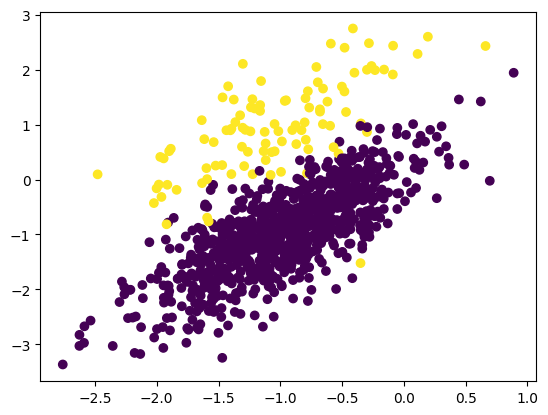

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [ ]:
## Apply SMOTE
from imblearn.over_sampling import SMOTE

In [ ]:
oversample=SMOTE()
x,y = oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [ ]:
x.shape

(1800, 2)

In [ ]:
y.shape

(1800,)

In [ ]:
len(y[y==0])

900

In [ ]:
df1= pd.DataFrame(x, columns=['f1','f2'])
df2= pd.DataFrame(y,columns=['target'])
oversample_df =pd.concat([df1,df2],axis=1)
oversample_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [ ]:
oversample_df['target'].value_counts()

,count
target,
0,900
1,900


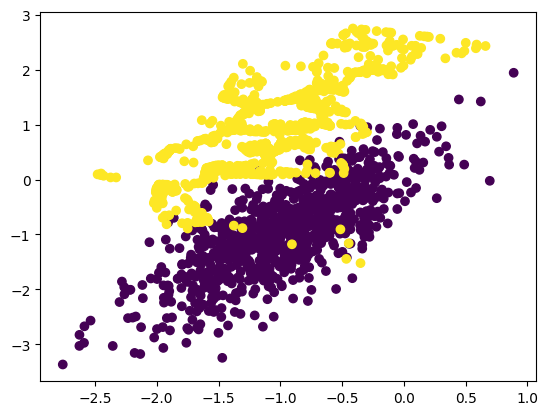

In [ ]:
plt.scatter(oversample_df['f1'], oversample_df['f2'], c=oversample_df['target'])

### Handling Outliers with Python

In [ ]:
## 5 Number Summary and Box Plot
## minimum, maximum, Q1, Q2, Q3, IQR
import numpy as np

In [ ]:
lst_marks = [45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74]
minimum,Q1,median,Q3,maximum=np.quantile(lst_marks,[0,0.25,0.50,0.75,1.0])

In [ ]:
print(minimum,Q1,median,Q3,maximum)

32.0 54.0 67.0 89.0 99.0


In [ ]:
IQR = Q3-Q1
IQR

np.float64(35.0)

In [ ]:
lower_fence = Q1-1.5*(IQR)
higher_fence = Q3+1.5*(IQR)



In [ ]:
lower_fence,higher_fence

(np.float64(1.5), np.float64(141.5))

In [ ]:
import seaborn as sns

<Axes: >

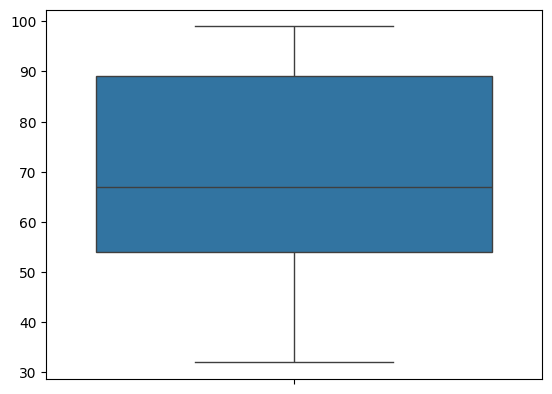

In [ ]:
sns.boxplot(lst_marks)

<Axes: >

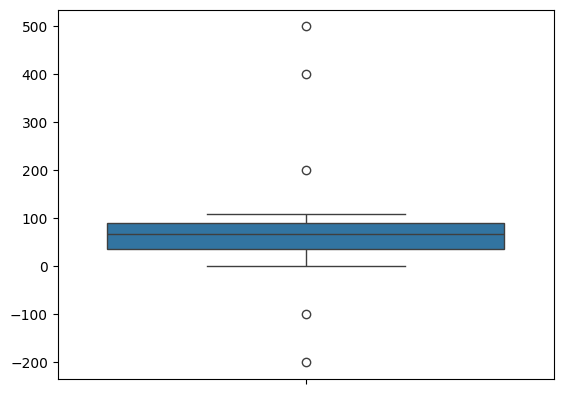

In [ ]:
lst_marks = [-100,-200,1,12,23,45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74,110,200,400,500]
sns.boxplot(lst_marks)

### Data Encoding -
### 1. Nominal/ONE Hot Encoding
### 2. Label and Ordinal Encoding
### 3. Target Guided Ordinal Encoding

---



In [ ]:
### 1. Nominal/ONE HOT Encoding

import pandas as pd
from sklearn.preprocessing import OneHotEncoder



In [ ]:
# create dataframe
df = pd.DataFrame({
    'color' : ['red','blue','green','green','red','blue']
})

In [ ]:
df

,color
0,red
1,blue
2,green
3,green
4,red
5,blue


In [ ]:
## create an instance of onehotencoder
encoder= OneHotEncoder()

## perform Fit and transform
encoded= encoder.fit_transform(df[['color']]).toarray()


In [ ]:
encoded

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [ ]:
encoder_df = pd.DataFrame(encoded,columns=encoder.get_feature_names_out())
encoder_df

,color_blue,color_green,color_red
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,1.0,0.0,0.0


In [ ]:
#for new data
encoder.transform([['blue']]).toarray()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[1., 0., 0.]])

In [ ]:
pd.concat([df,encoder_df],axis=1)

,color,color_blue,color_green,color_red
0,red,0.0,0.0,1.0
1,blue,1.0,0.0,0.0
2,green,0.0,1.0,0.0
3,green,0.0,1.0,0.0
4,red,0.0,0.0,1.0
5,blue,1.0,0.0,0.0


In [ ]:
## 2. label Encoding
df.head()

,color
0,red
1,blue
2,green
3,green
4,red


In [ ]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder = LabelEncoder()

lbl_encoded= lbl_encoder.fit_transform(df[['color']])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
lbl_encoded

array([2, 0, 1, 1, 2, 0])

In [ ]:
### Ordinal Encoding

df = pd.DataFrame(
    {
        'size':['small','medium','large','medium','small','large']
    }
)


In [ ]:
df

,size
0,small
1,medium
2,large
3,medium
4,small
5,large


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ord_encoder= OrdinalEncoder(categories=[['small','medium','large']])
ord_encoded = ord_encoder.fit_transform(df[['size']])

In [ ]:
ord_encoded

array([[0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [2.]])

In [ ]:
### tagret Guided ordinal Encoding

df = pd.DataFrame({
    'city':['New York','London','Paris','Tokyo','New York','Paris'],
    'price':[200,150,300,250,180,320]
})

In [ ]:
df

,city,price
0,New York,200
1,London,150
2,Paris,300
3,Tokyo,250
4,New York,180
5,Paris,320


In [ ]:
mean_price=df.groupby('city')['price'].mean().to_dict()
mean_price

{'London': 150.0, 'New York': 190.0, 'Paris': 310.0, 'Tokyo': 250.0}

In [ ]:
df['city_encoded']= df['city'].map(mean_price)

In [ ]:
df  ## city_encoded is new variable of that is city is converted into numerical veriable as city_encoded

,city,price,city_encoded
0,New York,200,190.0
1,London,150,150.0
2,Paris,300,310.0
3,Tokyo,250,250.0
4,New York,180,190.0
5,Paris,320,310.0
